In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt  


In [31]:
df=pd.read_csv(r"C:\Users\gpkt2\OneDrive\Desktop\Coral_DataSet\Florida Keys Coral Reef Evaluation Dataset\CREMP_CSV_files\CREMP_SCOR_Summaries_2023_LTA.csv")
#print(df.head(5))
#df.info()
print(df.columns)
print(df["StationID"].unique())

Index(['Year', 'Date', 'Subregion', 'Habitat', 'SiteID', 'Site_name',
       'StationID', 'Acropora_cervicornis', 'Acropora_palmata',
       'Acropora_prolifera', 'Agaricia_fragilis', 'Agaricia_lamarcki',
       'Cladocora_arbuscula', 'Colpophyllia_natans', 'Dendrogyra_cylindrus',
       'Dichocoenia_stokesii', 'Diploria_labyrinthiformis',
       'Eusmilia_fastigiata', 'Favia_fragum', 'Helioseris_cucullata',
       'Isophyllia_rigida', 'Isophyllia_sinuosa', 'Madracis_aurentenra',
       'Madracis_decactis', 'Madracis_pharensis', 'Madracis_scenaria',
       'Madracis_sp', 'Manicina_areolata', 'Meandrina_meandrites',
       'Millepora_complanata', 'Montastraea_cavernosa', 'Mussa_angulosa',
       'Mycetophyllia_aliciae', 'Mycetophyllia_danaana', 'Mycetophyllia_ferox',
       'Mycetophyllia_lamarckiana', 'Mycetophyllia_sp', 'Oculina_diffusa',
       'Oculina_robusta', 'Orbicella_annularis_complex', 'Orbicella_faveolata',
       'Orbicella_franksi', 'Phyllangia_americana', 'Porites_astreoi

In [32]:
##getting all the living corals together 
living_coral=df.columns[7:]
print(living_coral)
df["total_lfa"]=df[living_coral].sum(axis=1)
df[['StationID','total_lfa']].head()

Index(['Acropora_cervicornis', 'Acropora_palmata', 'Acropora_prolifera',
       'Agaricia_fragilis', 'Agaricia_lamarcki', 'Cladocora_arbuscula',
       'Colpophyllia_natans', 'Dendrogyra_cylindrus', 'Dichocoenia_stokesii',
       'Diploria_labyrinthiformis', 'Eusmilia_fastigiata', 'Favia_fragum',
       'Helioseris_cucullata', 'Isophyllia_rigida', 'Isophyllia_sinuosa',
       'Madracis_aurentenra', 'Madracis_decactis', 'Madracis_pharensis',
       'Madracis_scenaria', 'Madracis_sp', 'Manicina_areolata',
       'Meandrina_meandrites', 'Millepora_complanata', 'Montastraea_cavernosa',
       'Mussa_angulosa', 'Mycetophyllia_aliciae', 'Mycetophyllia_danaana',
       'Mycetophyllia_ferox', 'Mycetophyllia_lamarckiana', 'Mycetophyllia_sp',
       'Oculina_diffusa', 'Oculina_robusta', 'Orbicella_annularis_complex',
       'Orbicella_faveolata', 'Orbicella_franksi', 'Phyllangia_americana',
       'Porites_astreoides', 'Porites_branneri', 'Porites_porites',
       'Pseudodiploria_clivosa', 'Pseu

,StationID,total_lfa
0,181,1665.4
1,182,7858.3
2,183,815.8
3,184,1278.7
4,211,7726.4


          Date  StationID  total_lfa
0    5/11/2013        231    69825.8
1    5/11/2013        232    56621.0
2    5/11/2023        231    69337.3
3    5/11/2023        232    40521.5
4    5/12/2012        181     1176.8
..         ...        ...        ...
121  9/20/2020        232    49515.5
122  9/28/2020        181      666.4
123  9/28/2020        182     6052.7
124  9/28/2020        183      501.9
125  9/28/2020        184     1479.8

[126 rows x 3 columns]


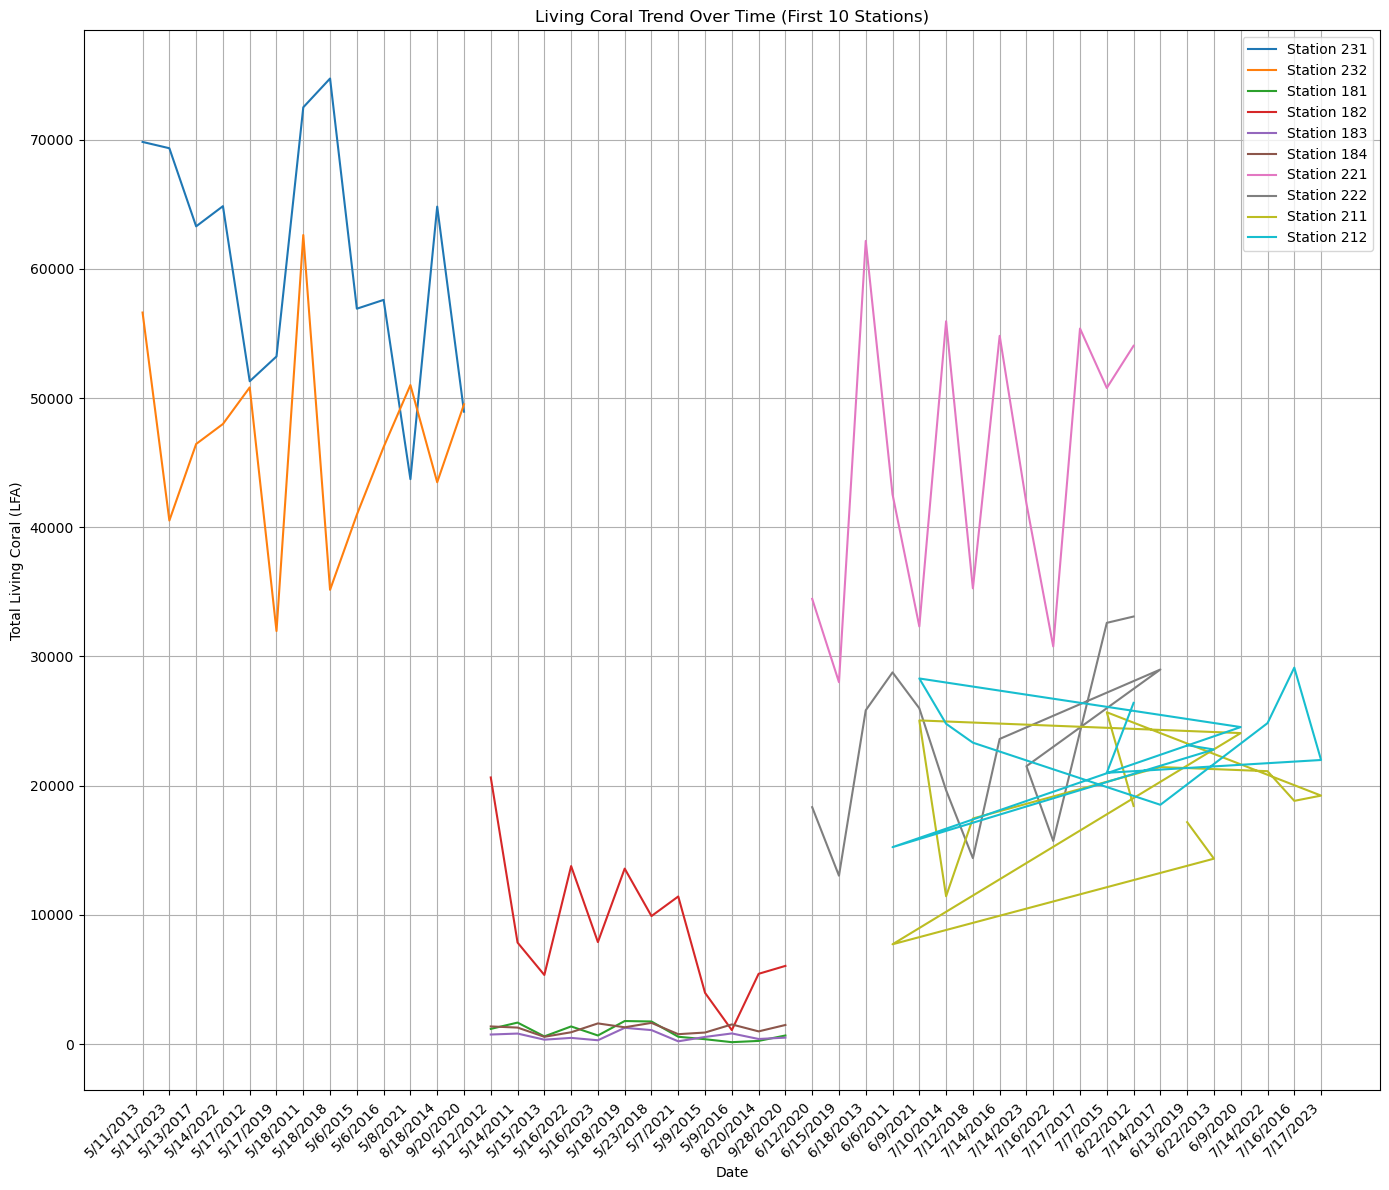

In [35]:
subset_stations = df[df['StationID'].isin(df['StationID'].unique()[:10])]
#print(subset_stations)
grouped_data=subset_stations.groupby(['Date','StationID',])['total_lfa'].mean().reset_index()
print(grouped_data)
plt.figure(figsize=(14, 12))
for station in grouped_data['StationID'].unique():
    station_data = grouped_data[grouped_data['StationID'] == station]
    plt.plot(station_data['Date'], station_data['total_lfa'], label=f'Station {station}')

plt.title('Living Coral Trend Over Time (First 10 Stations)')
plt.xlabel('Date')
plt.ylabel('Total Living Coral (LFA)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Varying Levels of LFA: There are substantial differences in the absolute levels of living coral area between the different monitoring stations. For instance, Station 231 and Station 232 generally exhibit much higher LFA values compared to stations like 181, 182, 183, and 184.

Different Temporal Trends: The way LFA changes over time is also unique for each station:

Some stations (e.g., 231, 232) show considerable fluctuations, with periods of increase and decrease.
Other stations (e.g., 181, 182, 183, 184) generally maintain lower LFA values with their own patterns of variation.
Stations that appear later in the legend (e.g., 221, 222, 211, 212) have data starting at later time points.
Potential Events: Some stations show sharp declines or increases in LFA at specific points in time, which might correspond to environmental events (e.g., storms, bleaching events, disease outbreaks) that could have differentially impacted the sites.

Data Gaps: As noted before, there are periods where data is missing for certain stations, making it harder to assess long-term trends for those specific locations.

Determining Significant Differences in LFA Between Monitoring Sites:

Based solely on this visualization, we can make a qualitative assessment of differences, but we cannot definitively determine if these differences are statistically significant. To do that, we would need to perform statistical analysis. Here's why and what would be involved:

Visual Differences vs. Statistical Significance: While the plot clearly shows different average levels and temporal patterns of LFA across stations, these observed differences could potentially arise due to random variation. Statistical tests help us determine if the observed differences are larger than what we would expect by chance.

Statistical Approaches: To formally test for significant differences, you would typically use methods like:

Analysis of Variance (ANOVA): This test can compare the means of LFA across multiple stations at a given point in time or over the entire study period. A significant ANOVA result would indicate that there is a statistically significant difference in the mean LFA among the stations.
Post-hoc Tests (e.g., Tukey's HSD, Bonferroni): If ANOVA reveals a significant overall difference, post-hoc tests can be used to determine which specific pairs of stations have significantly different mean LFA.
Time Series Analysis (e.g., ARIMA, Regression with Station as a factor): To account for the temporal dependence of the data, more sophisticated time series models that include "Station" as a predictor variable could be used to assess if the station has a significant effect on the LFA trend over time.
Non-parametric Tests (e.g., Kruskal-Wallis): If the data does not meet the assumptions of parametric tests like ANOVA (e.g., normality, equal variances), non-parametric alternatives can be used.
In Conclusion:

The plot provides strong visual evidence that there are apparent differences in the living tissue area of stony corals between the monitoring sites, both in terms of average levels and how they change over time. However, to definitively state whether these differences are statistically significant, you would need to perform appropriate statistical analyses on the underlying data. The visualization serves as a valuable tool for initial exploration and hypothesis generation before conducting those analyses.